In [181]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [182]:
def plot_xy(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x,y)

In [183]:
#对原始数据归一化, 避免出现大数字导致的计算误差
def normalize_data(x):
    x1 = (x - np.mean(x)) / (np.max(x) - np.min(x))
    return x1

5 9


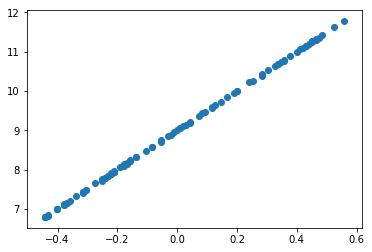

In [186]:
#随机生成原始数据
N = 100
x0 = np.random.randint(1,100, (N))
x0 = normalize_data(x0)
w0 = np.random.randint(-10, 10)
b0 = np.random.randint(-100, 100)

y0 = w0 * x0 + b0 + np.random.randn(N)*0.01

print w0, b0
plot_xy(x0, y0)

In [187]:
#计算模型预测值f（x）= w * x + b
def f_eval(x, w, b):
    return w * x + b

In [188]:
#计算梯度
#nabla_w = ∑x ＊（ｆ－ｙ）
#nabla_b = ∑(f - y)
def gradient(x, y, w, b):
    f = f_eval(x, w, b)
    delta = f - y 
    nb = float(np.sum(f-y))
    nw = float(np.dot(delta, x))
    return nw, nb

In [189]:
#Cost funciton, C = 1/2n * ∑（f-y)^2
def cost(x, y, w, b):
    n = len(x) * 1.0
    delta = f_eval(x, w, b) - y
    c = np.sum(np.power(delta, 2)) / n / 2.0
    return c

In [199]:
def line_regression(x, y, w, b, eta, iters, auto_adjust=False):
    m = len(x) * 1.0 #样本数据大小
    costs=[]
    
    for i in range(iters):
        nw, nb = gradient(x, y, w, b)
        c = cost(x, y, w, b)        
        w = w - eta/m * nw
        b = b - eta/m * nb
        costs.append(c)
        if (c<1e-5):
            break
        
        #自动调整步长，逐步减小eta值
        if (auto_adjust) and (i % 500) == 0:
            eta *= 0.8            
    return w, b, costs
        

In [204]:
#测试线性回归模型，初始w，b为随机生成
def test_linear_regression(x, y, eta, iters, auto_adjust=False):
    w1 = np.random.randint(-10,10)
    b1 = np.random.randint(-100,100)

    print w1,b1

    w, b, costs = line_regression(x, y, w1, b1, eta, iters, auto_adjust)

    print '----------------Result----------'
    print 'eta=', eta
    print 'w=', w, 'b=', b, 'cost=', costs[-1], 'iterations=', len(costs)
    print 'w0=', w0, 'b0=', b0

    index = range(0, len(costs))
    plot_xy(index, np.log(costs))   

8 64
----------------Result----------
eta= 0.1
w= 4.99881766596 b= 9.00008820093 cost= 4.50816246848e-05 iterations= 1000
w0= 5 b0= 9


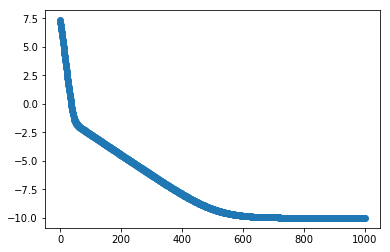

In [205]:
#Learning rate 为0.1, 收敛太慢
test_linear_regression(x0, y0, 0.1, 1000)

7 31
----------------Result----------
eta= 0.5
w= 4.99842845066 b= 9.00008820093 cost= 4.50747535262e-05 iterations= 1000
w0= 5 b0= 9


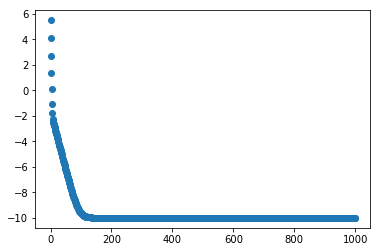

In [193]:
test_linear_regression(x0, y0, 0.5, 1000)

9 -10
----------------Result----------
eta= 1.0
w= 4.99842845066 b= 9.00008820093 cost= 4.50747535262e-05 iterations= 1000
w0= 5 b0= 9


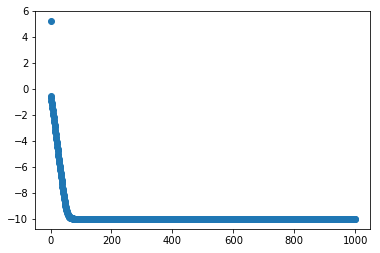

In [194]:
test_linear_regression(x0, y0, 1.0, 1000)

-3 -58
----------------Result----------
eta= 2.0
w= 4.99842845066 b= -58.0 cost= 2244.50595454 iterations= 1000
w0= 5 b0= 9


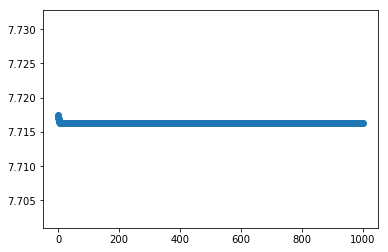

In [207]:
#Learning rate 2.0，步长太大，不收敛
test_linear_regression(x0, y0, 2.0, 1000)

3 -39
----------------Result----------
eta= 2.0
w= 4.99842845066 b= 9.00008820093 cost= 4.50747535262e-05 iterations= 1000
w0= 5 b0= 9


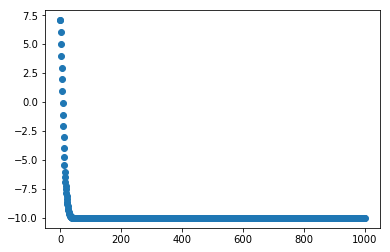

In [208]:
#Learning rate 初始为零，程序每500步自动调整步长，收敛快，效果好
test_linear_regression(x0, y0, 2.0, 1000, True)